In [1]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
##failed2 = []
##passed2 = []
#for x in all_tickers.index[100:200]:
   # try:
      #  data_frame2[x] = web.DataReader(x, data_source= "yahoo", start = "2019-1-1")["Adj Close"]
      #  passed2.append(x)
    #except (IOError, KeyError):
       # msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        #failed2.append(x)

In [3]:
sandp  = pd.read_csv('resources/sandpdata.csv')

In [4]:
len(sandp["Symbol"])

480

In [5]:
data = pd.DataFrame()

In [6]:
failed2 = []
passed2 = []
for x in sandp["Symbol"]:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2019-1-1")["Adj Close"]
        passed2.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed2.append(x)

In [7]:
failed2

['GGP', 'MON', 'SCG']

In [8]:
data.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,183.068054,42.443329,68.076973,82.120384,138.303879,46.655220,114.642334,224.570007,157.235001,18.830000,...,147.045517,100.250526,46.639339,19.286905,85.283569,65.474289,89.536743,101.280602,40.154263,83.823868
2019-01-03,176.174835,41.418125,64.864136,79.414642,133.581940,44.998528,110.881607,215.699997,162.143646,17.049999,...,143.960770,99.280663,46.455570,18.865334,82.072556,63.229786,87.284607,99.448669,39.932148,80.926529
2019-01-04,183.422806,43.077972,66.715439,81.973129,138.776093,46.794102,116.074997,226.190002,158.121140,19.000000,...,147.851089,103.284927,46.910160,19.593504,85.872749,65.897575,89.556320,102.845154,41.158604,84.101685
2019-01-07,183.000946,43.849316,67.714539,83.169548,139.258118,48.113506,117.806122,229.259995,160.441040,20.570000,...,148.941528,105.119019,46.707050,20.015074,88.141090,64.922997,89.458405,102.884758,41.322777,84.607712
2019-01-08,183.767899,44.923336,66.901543,83.556091,142.779892,49.571793,119.925255,232.679993,159.325897,20.750000,...,149.894470,108.412689,47.248684,20.676178,86.461929,65.533348,89.282150,100.577530,41.699402,85.867859


In [9]:
len(data.columns)

477

In [10]:
sandp.set_index("Symbol", inplace=True)

In [11]:
sandp.drop(failed2, inplace=True )

In [12]:
sandp.head()

,Name,Sector
Symbol,,
MMM,3M Company,Industrials
AOS,A.O. Smith Corp,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie Inc.,Health Care
ACN,Accenture plc,Information Technology


In [13]:
len(sandp.index)

477

## lets check for missing data

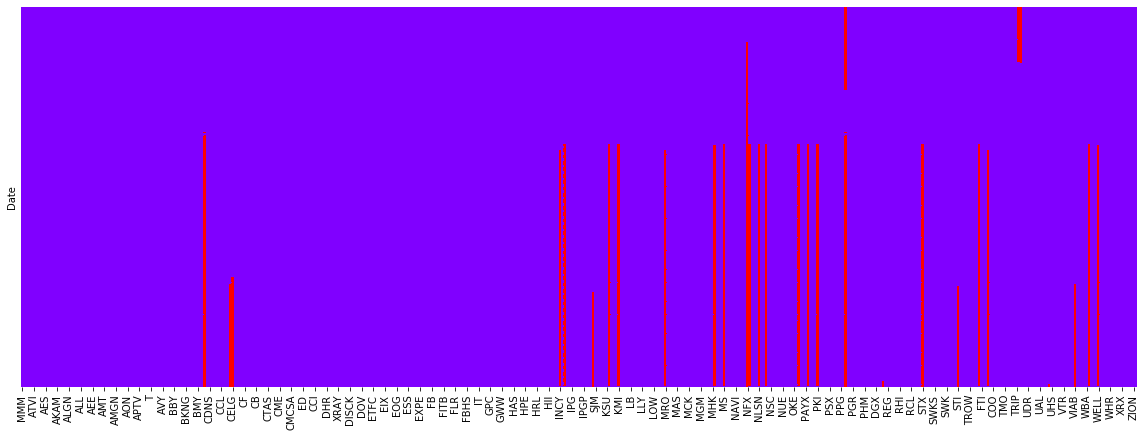

In [14]:
plt.figure(figsize=(20,7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="rainbow")

In [15]:
data.dropna(axis=1, inplace=True)

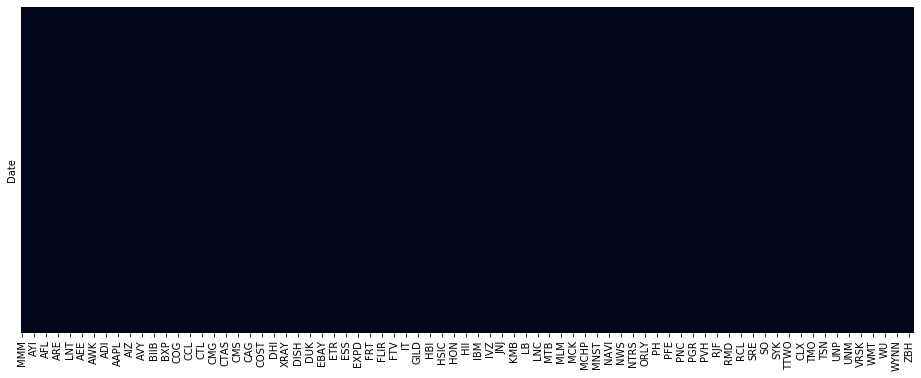

In [16]:
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321 entries, 2019-01-02 to 2020-04-09
Columns: 447 entries, MMM to ZTS
dtypes: float64(447)
memory usage: 1.1 MB


In [18]:
data.to_csv('resources/final_adj.csv')

In [19]:
sandp.to_csv("resources/final_sandp.csv")

In [20]:
returns_frame = pd.DataFrame()

In [21]:
for x in data:
    returns_frame[f"{x} daily returns"] = data[f"{x}"].pct_change()

In [22]:
len(returns_frame.columns)

447

In [23]:
len(data.columns)

447

In [24]:
returns_frame

,MMM daily returns,AOS daily returns,ABT daily returns,ABBV daily returns,ACN daily returns,ATVI daily returns,AYI daily returns,ADBE daily returns,AAP daily returns,AMD daily returns,...,WLTW daily returns,WYNN daily returns,XEL daily returns,XRX daily returns,XLNX daily returns,XYL daily returns,YUM daily returns,ZBH daily returns,ZION daily returns,ZTS daily returns
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.037654,-0.024155,-0.047194,-0.032948,-0.034142,-0.035509,-0.032804,-0.039498,0.031219,-0.094530,...,-0.020978,-0.009674,-0.003940,-0.021858,-0.037651,-0.034281,-0.025153,-0.018088,-0.005532,-0.034565
2019-01-04,0.041141,0.040075,0.028541,0.032217,0.038884,0.039903,0.046837,0.048632,-0.024808,0.114370,...,0.027023,0.040333,0.009785,0.038598,0.046303,0.042192,0.026027,0.034153,0.030713,0.039235
2019-01-07,-0.002300,0.017906,0.014976,0.014595,0.003473,0.028196,0.014914,0.013573,0.014672,0.082632,...,0.007375,0.017758,-0.004330,0.021516,0.026415,-0.014789,-0.001093,0.000385,0.003989,0.006017
2019-01-08,0.004191,0.024493,-0.012006,0.004648,0.025290,0.030309,0.017988,0.014918,-0.006950,0.008751,...,0.006398,0.031333,0.011596,0.033030,-0.019051,0.009401,-0.001970,-0.022425,0.009114,0.014894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03,-0.029875,-0.001948,0.000126,-0.023426,-0.026365,-0.013162,-0.021501,-0.034051,-0.042529,-0.042706,...,-0.008333,-0.079172,-0.042370,-0.085498,-0.000884,-0.045741,-0.041635,-0.007550,-0.027964,-0.012238
2020-04-06,0.051648,0.065514,0.041284,0.032166,0.091357,0.027009,0.110934,0.086918,0.131837,0.115755,...,0.116303,0.169691,0.056861,0.107101,0.070435,0.077521,0.113744,0.064450,0.091167,0.106273
2020-04-07,0.027719,0.037677,-0.009670,-0.004490,-0.011623,-0.028084,0.037761,-0.031962,0.037888,0.000842,...,0.018990,0.072625,-0.031398,-0.005345,-0.008269,0.015340,0.012057,0.040535,0.041218,-0.005363


## calculate mean daily returns for each security

In [25]:
mean_Daily_returns = []
for x in returns_frame:
    mean_Daily_returns.append(returns_frame[x].mean()  * 252)

In [26]:
len(mean_Daily_returns)

447

### Calulate the volitility for each security

In [27]:
security_vol = []
for x in returns_frame:
    security_vol.append(returns_frame[x].std() * np.sqrt(252))


In [28]:
len(security_vol)

447

### lets create a new frame withe secrity/vol/returns 

In [29]:
working_frame = pd.DataFrame(mean_Daily_returns, index=returns_frame.columns, columns=["mean daily returns"])

In [30]:
working_frame["volitility"] = security_vol

In [31]:
working_frame

,mean daily returns,volitility
MMM daily returns,-0.110219,0.340273
AOS daily returns,0.006946,0.314144
ABT daily returns,0.236447,0.323124
ABBV daily returns,0.036240,0.339818
ACN daily returns,0.251651,0.328266
...,...,...
XYL daily returns,0.116961,0.378445
YUM daily returns,-0.020574,0.365674
ZBH daily returns,0.139133,0.379756
ZION daily returns,-0.138885,0.358064


In [32]:
abbrv = [x.split()[0] for x in working_frame.index]

In [33]:
working_frame["ticker"] = abbrv

In [34]:
working_frame

,mean daily returns,volitility,ticker
MMM daily returns,-0.110219,0.340273,MMM
AOS daily returns,0.006946,0.314144,AOS
ABT daily returns,0.236447,0.323124,ABT
ABBV daily returns,0.036240,0.339818,ABBV
ACN daily returns,0.251651,0.328266,ACN
...,...,...,...
XYL daily returns,0.116961,0.378445,XYL
YUM daily returns,-0.020574,0.365674,YUM
ZBH daily returns,0.139133,0.379756,ZBH
ZION daily returns,-0.138885,0.358064,ZION


## We will need to being the sectors in to the new frame and align them with the proper ticker form the original sandp frame

In [35]:
ticker_and_sector_dict = dict(zip(sandp.index, sandp["Sector"]))

In [36]:
working_frame["sector"] = working_frame["ticker"].apply(lambda x: ticker_and_sector_dict[x])

In [37]:
working_frame

,mean daily returns,volitility,ticker,sector
MMM daily returns,-0.110219,0.340273,MMM,Industrials
AOS daily returns,0.006946,0.314144,AOS,Industrials
ABT daily returns,0.236447,0.323124,ABT,Health Care
ABBV daily returns,0.036240,0.339818,ABBV,Health Care
ACN daily returns,0.251651,0.328266,ACN,Information Technology
...,...,...,...,...
XYL daily returns,0.116961,0.378445,XYL,Industrials
YUM daily returns,-0.020574,0.365674,YUM,Consumer Discretionary
ZBH daily returns,0.139133,0.379756,ZBH,Health Care
ZION daily returns,-0.138885,0.358064,ZION,Financials


In [38]:
company_name_tickers = dict(zip(working_frame["ticker"], sandp["Name"]))

In [39]:
working_frame["name"] = working_frame["ticker"].apply(lambda x: company_name_tickers[x])

In [40]:
working_frame

,mean daily returns,volitility,ticker,sector,name
MMM daily returns,-0.110219,0.340273,MMM,Industrials,3M Company
AOS daily returns,0.006946,0.314144,AOS,Industrials,A.O. Smith Corp
ABT daily returns,0.236447,0.323124,ABT,Health Care,Abbott Laboratories
ABBV daily returns,0.036240,0.339818,ABBV,Health Care,AbbVie Inc.
ACN daily returns,0.251651,0.328266,ACN,Information Technology,Accenture plc
...,...,...,...,...,...
XYL daily returns,0.116961,0.378445,XYL,Industrials,V.F. Corp.
YUM daily returns,-0.020574,0.365674,YUM,Consumer Discretionary,Valero Energy
ZBH daily returns,0.139133,0.379756,ZBH,Health Care,Varian Medical Systems
ZION daily returns,-0.138885,0.358064,ZION,Financials,Ventas Inc


In [41]:
working_frame.to_csv("resources/working_Frame.csv")

In [42]:
working_frame.groupby("sector")["mean daily returns"].mean()

sector
Consumer Discretionary       -0.038345
Consumer Staples              0.177147
Energy                       -0.314371
Financials                    0.049363
Health Care                   0.177226
Industrials                   0.078675
Information Technology        0.220295
Materials                     0.091032
Real Estate                   0.111049
Telecommunication Services    0.052936
Utilities                     0.208513
Name: mean daily returns, dtype: float64

In [43]:
df_bySector = pd.DataFrame(working_frame.groupby("sector")["mean daily returns"].mean())

In [44]:
df_bySector.head()

,mean daily returns
sector,
Consumer Discretionary,-0.038345
Consumer Staples,0.177147
Energy,-0.314371
Financials,0.049363
Health Care,0.177226


In [45]:
df_bySector["number of companies"] = working_frame.groupby("sector")["name"].count()

In [46]:
df_bySector

,mean daily returns,number of companies
sector,,
Consumer Discretionary,-0.038345,75
Consumer Staples,0.177147,30
Energy,-0.314371,24
Financials,0.049363,60
Health Care,0.177226,55
Industrials,0.078675,60
Information Technology,0.220295,62
Materials,0.091032,21
Real Estate,0.111049,30


### Thre is low correlation to the number of companies and the mean deail returns for each sector

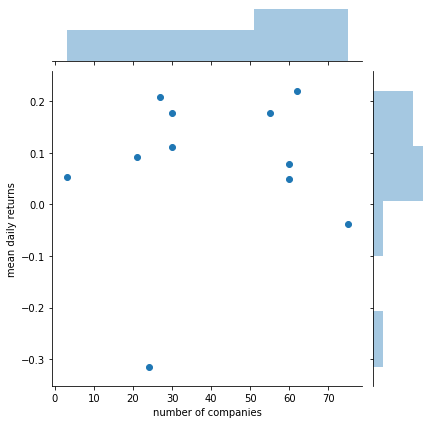

In [47]:
sns.jointplot(x = "number of companies", y = "mean daily returns", data=df_bySector)

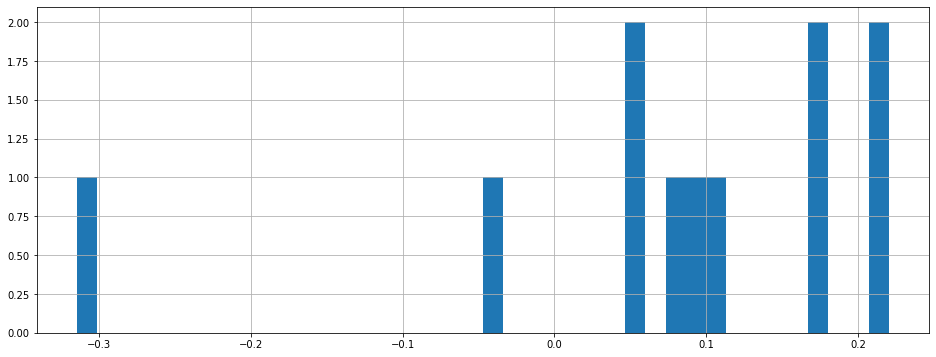

In [48]:
df_bySector["mean daily returns"].hist(figsize = (16,6), bins = 40)

In [49]:
working_frame.head()

,mean daily returns,volitility,ticker,sector,name
MMM daily returns,-0.110219,0.340273,MMM,Industrials,3M Company
AOS daily returns,0.006946,0.314144,AOS,Industrials,A.O. Smith Corp
ABT daily returns,0.236447,0.323124,ABT,Health Care,Abbott Laboratories
ABBV daily returns,0.036240,0.339818,ABBV,Health Care,AbbVie Inc.
ACN daily returns,0.251651,0.328266,ACN,Information Technology,Accenture plc


In [50]:
s_and_p_matrix = working_frame.pivot_table(index="name", columns= "sector", values="mean daily returns")

In [51]:
s_and_p_matrix

sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
name,,,,,,,,,,,
3M Company,NaN,NaN,NaN,NaN,NaN,-0.110219,NaN,NaN,NaN,NaN,NaN
A.O. Smith Corp,NaN,NaN,NaN,NaN,NaN,0.006946,NaN,NaN,NaN,NaN,NaN
AES Corp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156581
AFLAC Inc,NaN,NaN,NaN,-0.020600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMETEK Inc.,NaN,NaN,NaN,NaN,NaN,0.197995,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Valero Energy,-0.020574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Varian Medical Systems,NaN,NaN,NaN,NaN,0.139133,NaN,NaN,NaN,NaN,NaN,NaN
Ventas Inc,NaN,NaN,NaN,-0.138885,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
tech_and_returns = s_and_p_matrix["Industrials"]

In [53]:
tech_and_returns

name
3M Company               -0.110219
A.O. Smith Corp           0.006946
AES Corp                       NaN
AFLAC Inc                      NaN
AMETEK Inc.               0.197995
                            ...   
Valero Energy                  NaN
Varian Medical Systems         NaN
Ventas Inc                     NaN
Verisign Inc.                  NaN
eBay Inc.                      NaN
Name: Industrials, Length: 447, dtype: float64

In [54]:
returns_frame.corr()

,MMM daily returns,AOS daily returns,ABT daily returns,ABBV daily returns,ACN daily returns,ATVI daily returns,AYI daily returns,ADBE daily returns,AAP daily returns,AMD daily returns,...,WLTW daily returns,WYNN daily returns,XEL daily returns,XRX daily returns,XLNX daily returns,XYL daily returns,YUM daily returns,ZBH daily returns,ZION daily returns,ZTS daily returns
MMM daily returns,1.000000,0.550275,0.647048,0.498607,0.633852,0.353125,0.562013,0.505213,0.467679,0.499384,...,0.511273,0.459544,0.445048,0.521847,0.647432,0.678967,0.503382,0.501274,0.598571,0.548015
AOS daily returns,0.550275,1.000000,0.515170,0.373881,0.493246,0.397989,0.474116,0.487774,0.453339,0.434378,...,0.443674,0.483709,0.401966,0.410872,0.491614,0.596734,0.325540,0.319957,0.555419,0.455632
ABT daily returns,0.647048,0.515170,1.000000,0.580348,0.742696,0.440958,0.533754,0.638902,0.480701,0.517136,...,0.646054,0.353035,0.711317,0.465206,0.509203,0.704419,0.559277,0.526537,0.580629,0.742647
ABBV daily returns,0.498607,0.373881,0.580348,1.000000,0.590114,0.399425,0.487020,0.555322,0.414854,0.444643,...,0.477620,0.407527,0.461333,0.447243,0.356518,0.552646,0.422091,0.456320,0.505056,0.550467
ACN daily returns,0.633852,0.493246,0.742696,0.590114,1.000000,0.505812,0.618291,0.763309,0.533286,0.578239,...,0.704072,0.522294,0.640308,0.622075,0.549014,0.734874,0.664367,0.637470,0.647152,0.727522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL daily returns,0.678967,0.596734,0.704419,0.552646,0.734874,0.423754,0.646649,0.673518,0.572000,0.526325,...,0.695316,0.554692,0.645991,0.654133,0.547983,1.000000,0.541261,0.513869,0.670707,0.672294
YUM daily returns,0.503382,0.325540,0.559277,0.422091,0.664367,0.182096,0.538363,0.424864,0.517863,0.380309,...,0.630485,0.524159,0.531102,0.571241,0.332317,0.541261,1.000000,0.677212,0.459115,0.664749
ZBH daily returns,0.501274,0.319957,0.526537,0.456320,0.637470,0.213724,0.524280,0.432499,0.401718,0.399432,...,0.590975,0.551946,0.349389,0.621951,0.319172,0.513869,0.677212,1.000000,0.494791,0.577890
ZION daily returns,0.598571,0.555419,0.580629,0.505056,0.647152,0.341302,0.577914,0.564948,0.526083,0.455886,...,0.577871,0.564214,0.456575,0.570354,0.510023,0.670707,0.459115,0.494791,1.000000,0.529086


## Correlations beow seems to be pretty good but some companies my be in the same sector as amazon which we are comparing to. So lets set up a frame an add the correlated companies to the fame as well as the sector. we will then look at companies that are not in the same sector as amazon

In [55]:
similar_to_amazon = returns_frame.corrwith(returns_frame["AMZN daily returns"]).sort_values(ascending =False)

In [56]:
corr_to_amazon = pd.DataFrame(similar_to_amazon, columns=["correlation"])

In [57]:
corr_to_amazon["ticker"] = [x.split()[0] for x in corr_to_amazon.index]

In [58]:
corr_to_amazon["sector"] = corr_to_amazon["ticker"].apply(lambda x: ticker_and_sector_dict[x])

## WE can se that maky of the correlation between the companies are in the same sector as amazon

In [59]:
corr_to_amazon.head(20)

,correlation,ticker,sector
AMZN daily returns,1.000000,AMZN,Consumer Discretionary
MSFT daily returns,0.751853,MSFT,Information Technology
ADBE daily returns,0.713077,ADBE,Information Technology
GOOGL daily returns,0.711769,GOOGL,Information Technology
GOOG daily returns,0.705545,GOOG,Information Technology
CDNS daily returns,0.681452,CDNS,Information Technology
ANSS daily returns,0.681256,ANSS,Information Technology
FB daily returns,0.675818,FB,Information Technology
AAPL daily returns,0.673841,AAPL,Information Technology
SNPS daily returns,0.667044,SNPS,Information Technology


## add company Names

In [60]:
ticandcomp = dict(list(zip(sandp.index, sandp["Name"])))

In [61]:
corr_to_amazon["name"] = corr_to_amazon["ticker"].apply(lambda x: ticandcomp[x])

In [62]:
corr_to_amazon.head(15)

,correlation,ticker,sector,name
AMZN daily returns,1.000000,AMZN,Consumer Discretionary,Amazon.com Inc.
MSFT daily returns,0.751853,MSFT,Information Technology,Microsoft Corp.
ADBE daily returns,0.713077,ADBE,Information Technology,Adobe Systems Inc
GOOGL daily returns,0.711769,GOOGL,Information Technology,Alphabet Inc Class A
GOOG daily returns,0.705545,GOOG,Information Technology,Alphabet Inc Class C
CDNS daily returns,0.681452,CDNS,Information Technology,Cadence Design Systems
ANSS daily returns,0.681256,ANSS,Information Technology,ANSYS
FB daily returns,0.675818,FB,Information Technology,"Facebook, Inc."
AAPL daily returns,0.673841,AAPL,Information Technology,Apple Inc.
SNPS daily returns,0.667044,SNPS,Information Technology,Synopsys Inc.


### Lets check where the sector is not the same as amazon 'IT"

In [63]:
corr_to_amazon[corr_to_amazon["sector"] != "Information Technology"].head(20)

,correlation,ticker,sector,name
AMZN daily returns,1.000000,AMZN,Consumer Discretionary,Amazon.com Inc.
TROW daily returns,0.645893,TROW,Financials,T. Rowe Price Group
AMP daily returns,0.613030,AMP,Financials,Ameriprise Financial
COST daily returns,0.600147,COST,Consumer Staples,Costco Wholesale Corp.
BLK daily returns,0.596974,BLK,Financials,BlackRock
L daily returns,0.595123,L,Financials,Loews Corp.
WRK daily returns,0.594996,WRK,Materials,WestRock Company
FDX daily returns,0.593004,FDX,Industrials,FedEx Corporation
CAT daily returns,0.584098,CAT,Industrials,Caterpillar Inc.
IVZ daily returns,0.581559,IVZ,Financials,Invesco Ltd.


In [66]:
working_frame

,mean daily returns,volitility,ticker,sector,name
MMM daily returns,-0.110219,0.340273,MMM,Industrials,3M Company
AOS daily returns,0.006946,0.314144,AOS,Industrials,A.O. Smith Corp
ABT daily returns,0.236447,0.323124,ABT,Health Care,Abbott Laboratories
ABBV daily returns,0.036240,0.339818,ABBV,Health Care,AbbVie Inc.
ACN daily returns,0.251651,0.328266,ACN,Information Technology,Accenture plc
...,...,...,...,...,...
XYL daily returns,0.116961,0.378445,XYL,Industrials,V.F. Corp.
YUM daily returns,-0.020574,0.365674,YUM,Consumer Discretionary,Valero Energy
ZBH daily returns,0.139133,0.379756,ZBH,Health Care,Varian Medical Systems
ZION daily returns,-0.138885,0.358064,ZION,Financials,Ventas Inc


In [67]:
t_to_vol = dict(list(zip(working_frame["ticker"], working_frame["volitility"])))

In [71]:
t_to_avg_returns = dict(list(zip(working_frame["ticker"], working_frame["mean daily returns"])))

,correlation,ticker,sector,name
AMZN daily returns,1.000000,AMZN,Consumer Discretionary,Amazon.com Inc.
MSFT daily returns,0.751853,MSFT,Information Technology,Microsoft Corp.
ADBE daily returns,0.713077,ADBE,Information Technology,Adobe Systems Inc
GOOGL daily returns,0.711769,GOOGL,Information Technology,Alphabet Inc Class A
GOOG daily returns,0.705545,GOOG,Information Technology,Alphabet Inc Class C
...,...,...,...,...
SJM daily returns,0.220568,SJM,Consumer Staples,JM Smucker
CAG daily returns,0.200379,CAG,Consumer Staples,Conagra Brands
EQT daily returns,0.186005,EQT,Energy,EQT Corporation
PCG daily returns,0.158182,PCG,Utilities,PG&E Corp.


In [69]:
corr_to_amazon["vol"] = corr_to_amazon["ticker"].apply(lambda x : t_to_vol[x])

In [72]:
corr_to_amazon["avd daily returns"] = corr_to_amazon["ticker"].apply(lambda x:t_to_avg_returns[x] )

In [75]:
corr_to_amazon

,correlation,ticker,sector,name,vol,avd daily returns
AMZN daily returns,1.000000,AMZN,Consumer Discretionary,Amazon.com Inc.,0.288304,0.264411
MSFT daily returns,0.751853,MSFT,Information Technology,Microsoft Corp.,0.359955,0.465024
ADBE daily returns,0.713077,ADBE,Information Technology,Adobe Systems Inc,0.389156,0.351102
GOOGL daily returns,0.711769,GOOGL,Information Technology,Alphabet Inc Class A,0.331323,0.160974
GOOG daily returns,0.705545,GOOG,Information Technology,Alphabet Inc Class C,0.332145,0.170933
...,...,...,...,...,...,...
SJM daily returns,0.220568,SJM,Consumer Staples,JM Smucker,0.288420,0.216562
CAG daily returns,0.200379,CAG,Consumer Staples,Conagra Brands,0.403049,0.441139
EQT daily returns,0.186005,EQT,Energy,EQT Corporation,0.730484,-0.213045
PCG daily returns,0.158182,PCG,Utilities,PG&E Corp.,1.393708,0.441439


### we will create a portfolio that has 5 companies correlated to amazon that is in completely sectors

In [84]:
corr_to_amazon[corr_to_amazon["sector"] != "Consumer Discretionary"].head(50)

,correlation,ticker,sector,name,vol,avd daily returns
MSFT daily returns,0.751853,MSFT,Information Technology,Microsoft Corp.,0.359955,0.465024
ADBE daily returns,0.713077,ADBE,Information Technology,Adobe Systems Inc,0.389156,0.351102
GOOGL daily returns,0.711769,GOOGL,Information Technology,Alphabet Inc Class A,0.331323,0.160974
GOOG daily returns,0.705545,GOOG,Information Technology,Alphabet Inc Class C,0.332145,0.170933
CDNS daily returns,0.681452,CDNS,Information Technology,Cadence Design Systems,0.391465,0.474582
ANSS daily returns,0.681256,ANSS,Information Technology,ANSYS,0.389896,0.476266
FB daily returns,0.675818,FB,Information Technology,"Facebook, Inc.",0.370916,0.270417
AAPL daily returns,0.673841,AAPL,Information Technology,Apple Inc.,0.384203,0.504437
SNPS daily returns,0.667044,SNPS,Information Technology,Synopsys Inc.,0.356989,0.446514
CRM daily returns,0.654808,CRM,Information Technology,Salesforce.com,0.374714,0.174295


In [86]:
tickers = ["TROW","COST","AMZN", "CAT"]

In [87]:
working = pd.DataFrame()
for x in tickers:
    working[x] = web.DataReader(x, data_source= "yahoo", start = "2008-1-1")["Adj Close"]

In [88]:
working.head()

,TROW,COST,AMZN,CAT
Date,,,,
2008-01-02,41.793949,51.519650,96.250000,48.784142
2008-01-03,41.886326,50.748463,95.209999,48.611446
2008-01-04,39.107639,49.637009,88.790001,47.333672
2008-01-07,38.546242,49.886517,88.820000,47.471809
2008-01-08,36.471100,49.122879,87.879997,46.380493


## Returns

In [90]:
for x in tickers:
    working[f"{x} daily returns"] = working[f"{x}"].pct_change()

In [92]:
working.head()

,TROW,COST,AMZN,CAT,TROW daily returns,COST daily returns,AMZN daily returns,CAT daily returns
Date,,,,,,,,
2008-01-02,41.793949,51.519650,96.250000,48.784142,NaN,NaN,NaN,NaN
2008-01-03,41.886326,50.748463,95.209999,48.611446,0.002210,-0.014969,-0.010805,-0.003540
2008-01-04,39.107639,49.637009,88.790001,47.333672,-0.066339,-0.021901,-0.067430,-0.026285
2008-01-07,38.546242,49.886517,88.820000,47.471809,-0.014355,0.005027,0.000338,0.002918
2008-01-08,36.471100,49.122879,87.879997,46.380493,-0.053835,-0.015307,-0.010583,-0.022989


## Port daily returns

In [93]:
working.columns

Index(['TROW', 'COST', 'AMZN', 'CAT', 'TROW daily returns',
       'COST daily returns', 'AMZN daily returns', 'CAT daily returns'],
      dtype='object')

In [94]:
working["port daily return"] = working[['TROW daily returns','COST daily returns', 'AMZN daily returns', 'CAT daily returns']].sum(axis = 1)

In [95]:
working

,TROW,COST,AMZN,CAT,TROW daily returns,COST daily returns,AMZN daily returns,CAT daily returns,port daily return
Date,,,,,,,,,
2008-01-02,41.793949,51.519650,96.250000,48.784142,NaN,NaN,NaN,NaN,0.000000
2008-01-03,41.886326,50.748463,95.209999,48.611446,0.002210,-0.014969,-0.010805,-0.003540,-0.027104
2008-01-04,39.107639,49.637009,88.790001,47.333672,-0.066339,-0.021901,-0.067430,-0.026285,-0.181955
2008-01-07,38.546242,49.886517,88.820000,47.471809,-0.014355,0.005027,0.000338,0.002918,-0.006072
2008-01-08,36.471100,49.122879,87.879997,46.380493,-0.053835,-0.015307,-0.010583,-0.022989,-0.102715
...,...,...,...,...,...,...,...,...,...
2020-04-03,95.190002,288.649994,1906.589966,114.669998,-0.020074,-0.009709,-0.006379,-0.017732,-0.053894
2020-04-06,102.699997,305.119995,1997.589966,120.430000,0.078895,0.057059,0.047729,0.050231,0.233914
2020-04-07,101.900002,303.630005,2011.599976,121.919998,-0.007790,-0.004883,0.007013,0.012372,0.006713


## Daily Volitility

In [98]:
working["daily vol"] = working[['TROW daily returns','COST daily returns'
                                , 'AMZN daily returns', 'CAT daily returns']].std(axis = 1) * np.sqrt(252)

In [99]:
working

,TROW,COST,AMZN,CAT,TROW daily returns,COST daily returns,AMZN daily returns,CAT daily returns,port daily return,daily vol
Date,,,,,,,,,,
2008-01-02,41.793949,51.519650,96.250000,48.784142,NaN,NaN,NaN,NaN,0.000000,NaN
2008-01-03,41.886326,50.748463,95.209999,48.611446,0.002210,-0.014969,-0.010805,-0.003540,-0.027104,0.121098
2008-01-04,39.107639,49.637009,88.790001,47.333672,-0.066339,-0.021901,-0.067430,-0.026285,-0.181955,0.393277
2008-01-07,38.546242,49.886517,88.820000,47.471809,-0.014355,0.005027,0.000338,0.002918,-0.006072,0.139223
2008-01-08,36.471100,49.122879,87.879997,46.380493,-0.053835,-0.015307,-0.010583,-0.022989,-0.102715,0.308834
...,...,...,...,...,...,...,...,...,...,...
2020-04-03,95.190002,288.649994,1906.589966,114.669998,-0.020074,-0.009709,-0.006379,-0.017732,-0.053894,0.102962
2020-04-06,102.699997,305.119995,1997.589966,120.430000,0.078895,0.057059,0.047729,0.050231,0.233914,0.224949
2020-04-07,101.900002,303.630005,2011.599976,121.919998,-0.007790,-0.004883,0.007013,0.012372,0.006713,0.152131


## we will use this data to try to predict if Costo will be up or down

In [105]:
def check_retun(return_Col):
    if return_Col < 0:
        return int(0)
    if return_Col > 0:
        return int(1)

In [106]:
working["target"] = working["COST daily returns"].apply(check_retun)

In [109]:
final_data = working.dropna()

In [110]:
final_data

,TROW,COST,AMZN,CAT,TROW daily returns,COST daily returns,AMZN daily returns,CAT daily returns,port daily return,daily vol,target
Date,,,,,,,,,,,
2008-01-03,41.886326,50.748463,95.209999,48.611446,0.002210,-0.014969,-0.010805,-0.003540,-0.027104,0.121098,0.0
2008-01-04,39.107639,49.637009,88.790001,47.333672,-0.066339,-0.021901,-0.067430,-0.026285,-0.181955,0.393277,0.0
2008-01-07,38.546242,49.886517,88.820000,47.471809,-0.014355,0.005027,0.000338,0.002918,-0.006072,0.139223,1.0
2008-01-08,36.471100,49.122879,87.879997,46.380493,-0.053835,-0.015307,-0.010583,-0.022989,-0.102715,0.308834,0.0
2008-01-09,35.824409,50.861874,85.220001,46.435749,-0.017732,0.035401,-0.030269,0.001191,-0.011408,0.453902,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03,95.190002,288.649994,1906.589966,114.669998,-0.020074,-0.009709,-0.006379,-0.017732,-0.053894,0.102962,0.0
2020-04-06,102.699997,305.119995,1997.589966,120.430000,0.078895,0.057059,0.047729,0.050231,0.233914,0.224949,1.0
2020-04-07,101.900002,303.630005,2011.599976,121.919998,-0.007790,-0.004883,0.007013,0.012372,0.006713,0.152131,0.0


## prepping data

In [123]:
X = final_data.drop("target", axis = 1).values
y = final_data["target"].values

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
scalar  = MinMaxScaler()

In [128]:
X_train = scalar.fit_transform(X_train)

In [129]:
X_test = scalar.transform(X_test)

### Model

In [130]:
from tensorflow.keras.models import Sequential

In [131]:
from tensorflow.keras.layers import Dense

In [132]:
X_train.shape

(2149, 10)

In [133]:
model = Sequential()
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 5, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [134]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=300)

Train on 2149 samples, validate on 921 samples
Epoch 1/300
2149/2149 [==============================] - 2s 1ms/sample - loss: 0.6893 - val_loss: 0.6854
Epoch 2/300
2149/2149 [==============================] - 0s 132us/sample - loss: 0.6858 - val_loss: 0.6831
Epoch 3/300
2149/2149 [==============================] - 0s 132us/sample - loss: 0.6815 - val_loss: 0.6788
Epoch 4/300
2149/2149 [==============================] - 0s 131us/sample - loss: 0.6775 - val_loss: 0.6721
Epoch 5/300
2149/2149 [==============================] - 0s 131us/sample - loss: 0.6670 - val_loss: 0.6580
Epoch 6/300
2149/2149 [==============================] - 0s 131us/sample - loss: 0.6553 - val_loss: 0.6400
Epoch 7/300
2149/2149 [==============================] - 0s 129us/sample - loss: 0.6337 - val_loss: 0.6154
Epoch 8/300
2149/2149 [==============================] - 0s 134us/sample - loss: 0.6091 - val_loss: 0.5891
Epoch 9/300
2149/2149 [==============================] - 0s 131us/sample - loss: 0.5797 - val_loss:

2149/2149 [==============================] - 0s 131us/sample - loss: 0.0703 - val_loss: 0.0636
Epoch 77/300
2149/2149 [==============================] - 0s 134us/sample - loss: 0.0735 - val_loss: 0.0643
Epoch 78/300
2149/2149 [==============================] - 0s 130us/sample - loss: 0.0652 - val_loss: 0.0709
Epoch 79/300
2149/2149 [==============================] - 0s 132us/sample - loss: 0.0677 - val_loss: 0.0719
Epoch 80/300
2149/2149 [==============================] - 0s 131us/sample - loss: 0.0636 - val_loss: 0.0841
Epoch 81/300
2149/2149 [==============================] - 0s 130us/sample - loss: 0.0642 - val_loss: 0.0694
Epoch 82/300
2149/2149 [==============================] - 0s 132us/sample - loss: 0.0706 - val_loss: 0.0568
Epoch 83/300
2149/2149 [==============================] - 0s 132us/sample - loss: 0.0615 - val_loss: 0.0557
Epoch 84/300
2149/2149 [==============================] - 0s 133us/sample - loss: 0.0600 - val_loss: 0.0653
Epoch 85/300
2149/2149 [=================

2149/2149 [==============================] - 0s 133us/sample - loss: 0.0680 - val_loss: 0.0415
Epoch 152/300
2149/2149 [==============================] - 0s 134us/sample - loss: 0.0424 - val_loss: 0.0369
Epoch 153/300
2149/2149 [==============================] - 0s 136us/sample - loss: 0.0372 - val_loss: 0.0377
Epoch 154/300
2149/2149 [==============================] - 0s 134us/sample - loss: 0.0347 - val_loss: 0.0370
Epoch 155/300
2149/2149 [==============================] - 0s 133us/sample - loss: 0.0436 - val_loss: 0.0858
Epoch 156/300
2149/2149 [==============================] - 0s 134us/sample - loss: 0.0459 - val_loss: 0.0331
Epoch 157/300
2149/2149 [==============================] - 0s 132us/sample - loss: 0.0474 - val_loss: 0.0354
Epoch 158/300
2149/2149 [==============================] - 0s 132us/sample - loss: 0.0364 - val_loss: 0.0366
Epoch 159/300
2149/2149 [==============================] - 0s 135us/sample - loss: 0.0361 - val_loss: 0.0338
Epoch 160/300
2149/2149 [========

2149/2149 [==============================] - 0s 130us/sample - loss: 0.0282 - val_loss: 0.0246
Epoch 227/300
2149/2149 [==============================] - 0s 136us/sample - loss: 0.0392 - val_loss: 0.0329
Epoch 228/300
2149/2149 [==============================] - 0s 134us/sample - loss: 0.0284 - val_loss: 0.0528
Epoch 229/300
2149/2149 [==============================] - 0s 136us/sample - loss: 0.0411 - val_loss: 0.0332
Epoch 230/300
2149/2149 [==============================] - 0s 129us/sample - loss: 0.0328 - val_loss: 0.0301
Epoch 231/300
2149/2149 [==============================] - 0s 130us/sample - loss: 0.0287 - val_loss: 0.0313
Epoch 232/300
2149/2149 [==============================] - 0s 133us/sample - loss: 0.0282 - val_loss: 0.0286
Epoch 233/300
2149/2149 [==============================] - 0s 131us/sample - loss: 0.0321 - val_loss: 0.0402
Epoch 234/300
2149/2149 [==============================] - 0s 136us/sample - loss: 0.0316 - val_loss: 0.0235
Epoch 235/300
2149/2149 [========

In [135]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.689336,0.685438
1,0.685755,0.683095
2,0.681514,0.678774
3,0.677547,0.672058
4,0.666992,0.658013
...,...,...
295,0.028786,0.046412
296,0.062356,0.062492
297,0.023659,0.020719
298,0.031411,0.020047


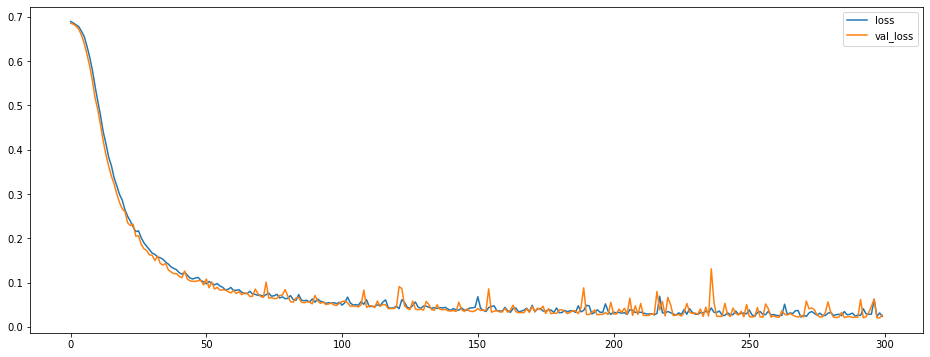

In [137]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

In [138]:
predicitons = model.predict_classes(X_test)

In [139]:
from sklearn.metrics import classification_report, confusion_matrix

In [140]:
print(classification_report(y_test,predicitons))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       446
         1.0       0.97      1.00      0.99       475

    accuracy                           0.98       921
   macro avg       0.99      0.98      0.98       921
weighted avg       0.99      0.98      0.98       921



In [151]:
print(confusion_matrix(y_test,predicitons))

[[432  14]
 [  0 475]]


## lets test with sample data

In [144]:
new_data = working.drop("target", axis=1).loc["2020-04-06"].values

In [146]:
len(working.drop("target", axis=1).loc["2020-04-06"].values)

10

In [149]:
new_data = scalar.transform(working.drop("target", axis=1).loc["2020-04-06"].values.reshape(-1,10))

In [150]:
model.predict(new_data)

array([[1.]], dtype=float32)